In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install diffusers transformers accelerate safetensors -q

In [3]:
import os
from kaggle_secrets import UserSecretsClient
import google.generativeai as genai

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

if not GOOGLE_API_KEY:
    raise ValueError("❌ GOOGLE_API_KEY is missing in Kaggle Secrets!")

genai.configure(api_key=GOOGLE_API_KEY)

text_model = genai.GenerativeModel("gemini-2.0-flash-lite")

In [4]:
def get_yt_ideas():
    topic = input("Enter your main topic: ")

    prompt = f"""
    Give 5 unique, clickable YouTube video ideas for the topic: {topic}.
    Make them simple, short, and beginner-friendly.
    """

    try:
        ideas = text_model.generate_content(prompt).text.strip()
        print("\n🎯 Generated Ideas:\n", ideas)
        return ideas
    except Exception as e:
        print("❌ Error generating ideas:", e)

ideas = get_yt_ideas()

Enter your main topic:  food



🎯 Generated Ideas:
 Here are 5 unique, clickable YouTube video ideas about food, designed to be simple, short, and beginner-friendly:

1.  **"3 Ingredient Mug Cake Magic! (Easy & Delicious)"** -  Focus: A super simple dessert recipe, perfect for beginners and those with limited ingredients. Showcasing the recipe (e.g., cake mix, milk, egg), the process, and a quick, satisfying taste test.  Include a call to action to subscribe for more easy recipes.

    *   **Clickable elements:**  "3 Ingredient," "Mug Cake," "Easy," "Delicious"
    *   **Visuals:** Quick cuts, close-ups of ingredients, the cake rising in the microwave, finished product.

2.  **"Quickest Homemade Pizza Dough (5 Minute Prep!)"** -  Focus:  A simplified pizza dough recipe that requires minimal time and effort.  The video could show the mixing process in a single bowl, a quick rise time (if using a faster yeast), and basic topping ideas.

    *   **Clickable elements:**  "Quickest," "Homemade Pizza," "5 Minute Prep"
   

In [5]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/sd-turbo",
    torch_dtype=torch.float32
)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cpu")

2025-11-30 09:47:56.964553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764496077.315116      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764496077.416316      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [7]:
def generate_thumbnail(idea, description):
    prompt = f"""
    YouTube thumbnail design:
    - Bright vibrant colors
    - Big bold text
    - Modern clean layout
    - Suitable emojis (🔥✨📚⚙️💡)
    - Eye-catching style
    Title/Idea: {idea}
    Description: {description}
    """

    print("\n🎨 Generating thumbnail… (5 seconds)...")
    image = pipe(prompt).images[0]
    print("✅ Thumbnail Ready!")
    return image


Enter the idea you want to create a thumbnail for:  veg vs non veg
Enter the description for the thumbnail:   Focus:  A recipe for delicious and easy garlic butter that enhances simple meals (bread, vegetables, etc.) with a tutorial showing how to make it, and showcasing different uses and adding a call to action.      *   **Clickable elements:** "Spice Up Your Meal," "DIY Homemade," "Garlic Butter!"     *   **Visuals:** Close-up shots of garlic being minced, the butter melting, the final product spread on bread.


Token indices sequence length is longer than the specified maximum sequence length for this model (135 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['showcasing different uses and adding a call to action. * ** clickable elements :** " spice up your meal," " diy homemade," " garlic butter!" * ** visuals :** close - up shots of garlic being minced, the butter melting, the final product spread on bread.']



🎨 Generating thumbnail… (5 seconds)...


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Thumbnail Ready!


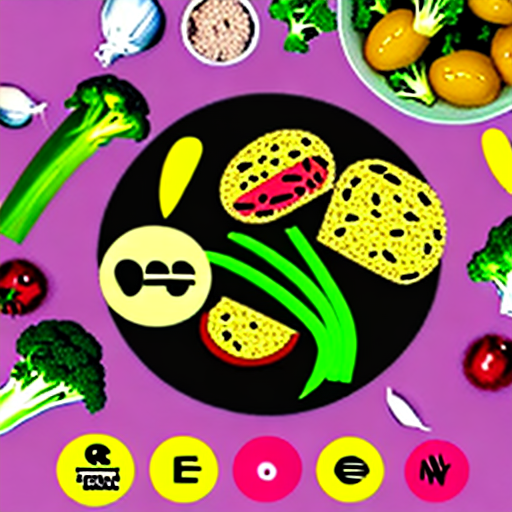

In [8]:
chosen_idea = input("\nEnter the idea you want to create a thumbnail for: ")
description = input("Enter the description for the thumbnail: ")

thumbnail = generate_thumbnail(chosen_idea, description)
thumbnail